###Clone the dataset & Read into memory

In [54]:
!git clone https://github.com/sagnikghoshcr7/Car-Price-Prediction.git

fatal: destination path 'Car-Price-Prediction' already exists and is not an empty directory.


In [55]:
import pandas as pd
import numpy as np

csv = pd.read_csv('./Car-Price-Prediction/data/dataset.csv', index_col=False)

csv.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [56]:
csv

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [57]:
# Drop the column that has a very high null ratio
csv.drop('New_Price', axis=1, inplace=True)

In [58]:
# Remove duplicates
csv.drop_duplicates(inplace=True)

In [59]:
# Mileage
csv['Mileage'] = csv['Mileage'].str.rstrip('kmpl')
csv['Mileage'] = csv['Mileage'].str.rstrip('km/g')

csv['Mileage'] = csv['Mileage'].astype('float')

# Replace values that are 0 with null values
csv.loc[csv['Mileage'] == 0.0, 'Mileage'] = np.nan

In [60]:
# Engine
csv['Engine'] = csv['Engine'].str.rstrip('CC')

In [61]:
# Power
csv['Power'] = csv['Power'].str.rstrip('bhp')
csv['Power'] = csv['Power'].replace(regex = 'null', value = np.nan)

In [62]:
# Seats
csv.loc[3999,'Seats'] = np.nan

In [63]:
dummycsv = csv['Name'].str.split(" ", n = 1, expand = True)

csv['Manufacturer'] = dummycsv[0]
csv['Model'] = dummycsv[1]

csv.loc[csv.Manufacturer == 'ISUZU', 'Manufacturer'] = 'Isuzu'
csv.loc[csv.Manufacturer == 'Land', 'Manufacturer'] = 'Land Rover'
csv.loc[csv.Manufacturer == 'Mini', 'Manufacturer'] = 'Mini Cooper'

In [64]:
csv['Engine'] = csv['Engine'].astype(float)
csv['Power'] = csv['Power'].astype(float)

In [65]:
csv.Kilometers_Driven.sort_values(ascending=False)

2328    6500000
340      775000
1860     720000
358      620000
3092     480000
         ...   
1242       1000
173        1000
2646       1000
5606        600
1361        171
Name: Kilometers_Driven, Length: 6019, dtype: int64

In [66]:
# Correct outlier data
csv['Kilometers_Driven'][csv['Kilometers_Driven'] == 6500000]= 775000

<ipython-input-66-464bdaeb774f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['Kilometers_Driven'][csv['Kilometers_Driven'] == 6500000]= 775000


In [67]:
# Missing value treatment
# Mileage
csv['Mileage']=csv.groupby(['Name','Year'], group_keys=False)['Mileage'].apply(lambda x:x.fillna(x.median()))
csv['Mileage']=csv.groupby(['Name'], group_keys=False)['Mileage'].apply(lambda x:x.fillna(x.median()))
csv['Mileage']=csv.groupby(['Manufacturer'], group_keys=False)['Mileage'].apply(lambda x:x.fillna(x.median()))
csv['Mileage'] = csv['Mileage'].fillna(csv['Mileage'].median())

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [68]:
csv['Mileage'].isna().sum()

0

In [69]:
# Engine
csv['Engine']=csv.groupby(['Name','Year'], group_keys=False)['Engine'].apply(lambda x:x.fillna(x.median()))
csv['Engine']=csv.groupby(['Manufacturer', 'Year'], group_keys=False)['Engine'].apply(lambda x:x.fillna(x.median()))
csv['Engine']=csv.groupby(['Manufacturer'], group_keys=False)['Engine'].apply(lambda x:x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [70]:
csv['Engine']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 6019, dtype: float64

In [71]:
# Power
csv['Power']=csv.groupby(['Name','Year'], group_keys=False)['Power'].apply(lambda x:x.fillna(x.median()))
csv['Power']=csv.groupby(['Manufacturer', 'Year'], group_keys=False)['Power'].apply(lambda x:x.fillna(x.median()))
csv['Power']=csv.groupby(['Name'], group_keys=False)['Power'].apply(lambda x:x.fillna(x.median()))
csv['Power']=csv.groupby(['Manufacturer'], group_keys=False)['Power'].apply(lambda x:x.fillna(x.median()))
csv['Power'] = csv['Power'].fillna(csv['Power'].median())

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [72]:
csv['Power'].isna().sum()

0

In [73]:
# Seats
csv['Seats'] = csv['Seats'].fillna(5)

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 6019, dtype: float64

In [74]:
# Drop Model as it has many outliers
csv.drop('Model', axis=1, inplace=True)

###Preprocessing & Encoding
- one-hot encoder (for strings like car brands) / label encoder (for integers)
- any top k feature selection from scikit
- Min-Max Scaler / Standard Scaler / Robust Scaler

In [75]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
csv['Kilometers_Driven'] = label_encoder.fit_transform(csv['Kilometers_Driven'])
csv['Seats'] = label_encoder.fit_transform(csv['Seats'])
csv['Mileage'] = label_encoder.fit_transform(csv['Mileage'])
csv['Engine'] = label_encoder.fit_transform(csv['Engine'])
csv['Power'] = label_encoder.fit_transform(csv['Power'])

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded_data = one_hot_encoder.fit_transform(csv[['Manufacturer', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type']])

# Concatenate the encoded columns to the original df
df_encoded = pd.concat([csv, pd.DataFrame(one_hot_encoded_data, columns=one_hot_encoder.get_feature_names_out(['Manufacturer', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type']))], axis=1)

# Drop the original columns
df_encoded = df_encoded.drop(['Unnamed: 0', 'Manufacturer', 'Name', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type'], axis=1)

df_encoded = pd.concat([df_encoded.drop('Price', axis=1), df_encoded['Price']], axis=1)
df_encoded

,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,Manufacturer_Datsun,...,Year_2019,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Price
0,2362,414,10,24,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.75
1,1128,291,53,193,2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.50
2,1356,249,24,109,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.50
3,2693,323,26,111,4,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.00
4,1120,155,73,213,2,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,596,424,26,66,2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.75
6015,2828,389,15,57,2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.00
6016,1709,112,108,166,5,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.90
6017,1356,270,10,47,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.65


###Splitting the dataset

In [76]:
from sklearn.model_selection import train_test_split
full_X = df_encoded.iloc[:,:-1]
full_Y = df_encoded.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(full_X, full_Y, test_size = 0.2, random_state=1)
X_train

,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,Manufacturer_Datsun,...,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
1579,1505,270,22,85,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4632,2623,273,53,196,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4455,1806,312,26,119,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2617,1711,225,28,100,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1714,1712,302,40,48,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2743,281,26,63,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5192,1511,309,22,92,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3980,2299,270,10,47,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
235,192,45,117,258,4,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Scaling the dataset

In [77]:
"""
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train)
X_train = ss.transform(X_train)

ss.fit(X_test)
X_test = ss.transform(X_test)

X_train
"""

'\nfrom sklearn.preprocessing import StandardScaler\n\nss = StandardScaler()\n\nss.fit(X_train)\nX_train = ss.transform(X_train)\n\nss.fit(X_test)\nX_test = ss.transform(X_test)\n\nX_train\n'

In [78]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

mm.fit(X_train)
X_train = mm.transform(X_train)

mm.fit(X_test)
X_test = mm.transform(X_test)

X_train

array([[0.48689744, 0.62937063, 0.14864865, ..., 0.        , 0.        ,
        0.        ],
       [0.84859269, 0.63636364, 0.35810811, ..., 0.        , 0.        ,
        0.        ],
       [0.58427693, 0.72727273, 0.17567568, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.74377224, 0.62937063, 0.06756757, ..., 0.        , 0.        ,
        0.        ],
       [0.06211582, 0.1048951 , 0.79054054, ..., 0.        , 0.        ,
        0.        ],
       [0.04788094, 0.92773893, 0.02702703, ..., 0.        , 0.        ,
        0.        ]])

###Apply PCA

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=60, svd_solver='full')
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

pca.explained_variance_ratio_

array([0.15062589, 0.07975589, 0.05081552, 0.04846791, 0.0373401 ,
       0.03419995, 0.03339932, 0.03182384, 0.03145653, 0.03002811,
       0.02885755, 0.02784304, 0.02693355, 0.02572877, 0.0248138 ,
       0.02441989, 0.02290594, 0.02180719, 0.02033367, 0.01948074,
       0.01748017, 0.0162665 , 0.01540422, 0.01445875, 0.01391821,
       0.01275252, 0.01257299, 0.01158929, 0.01082913, 0.01010274,
       0.00873964, 0.00873269, 0.0079222 , 0.00727633, 0.00672337,
       0.0060177 , 0.00568198, 0.00493136, 0.00423326, 0.00401975,
       0.00371359, 0.00308351, 0.00269258, 0.00262974, 0.0024226 ,
       0.00177097, 0.00139545, 0.00135507, 0.00129927, 0.00125295,
       0.00115994, 0.00100508, 0.00094646, 0.00092016, 0.0007976 ,
       0.00069694, 0.00060497, 0.00058983, 0.000549  , 0.00042424])

In [80]:
sum(pca.explained_variance_ratio_)

0.9982214035103429

###Training the models

#Random Forest

## K-Fold Cross Validation
For determining the best model for this regression problem

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
"""
# estimator
rf_regressor = RandomForestRegressor(random_state=1)

# parameter distribution
grid = {
    'n_estimators': [50, 100, 150, 250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 25, 30]
}

# kfold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Create RandomizedSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=grid, cv=kf, scoring='r2', n_jobs=-1, verbose=2)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)"""

'\n# estimator\nrf_regressor = RandomForestRegressor(random_state=1)\n\n# parameter distribution\ngrid = {\n    \'n_estimators\': [50, 100, 150, 250],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n    \'max_depth\': [10, 20, 25, 30]\n}\n\n# kfold cross-validation\nkf = KFold(n_splits=5, shuffle=True, random_state=1)\n\n# Create RandomizedSearchCV\ngrid_search = GridSearchCV(estimator=rf_regressor, param_grid=grid, cv=kf, scoring=\'r2\', n_jobs=-1, verbose=2)\n\n# Fit the model to the data\ngrid_search.fit(X_train, y_train)\n\n# Print the best parameters and the corresponding mean cross-validated score\nprint("Best Parameters: ", grid_search.best_params_)\nprint("Best Score: ", grid_search.best_score_)'

##Training

Get validation accuracy

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#bestrf = RandomForestRegressor(random_state=1, **grid_search.best_params_)
bestrf = RandomForestRegressor(random_state=1, max_depth=30, max_features='auto', n_estimators=250)
kf = KFold(n_splits=5, shuffle=True, random_state=1)
r2 = cross_val_score(bestrf, X_train, y_train, scoring='r2', cv=kf, n_jobs=-1)
mse = cross_val_score(bestrf, X_train, y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
print('-'*50)
print(f'Mean Squared Error (MSE): {-mse.mean():.4f}')
print(f'R^2 Score: {r2.mean():.4f}')
print('-'*50)

--------------------------------------------------
Mean Squared Error (MSE): 20.8384
R^2 Score: 0.8302
--------------------------------------------------


In [83]:
import matplotlib.pyplot as plt

x_temp = [0, 80]; y_temp = [0,80]
"""
plt.scatter(y_valid, y_predval)
plt.plot(x_temp, y_temp, 'r-')

plt.xlabel("Ground Truth Prices")
plt.ylabel("Predicted Prices")

plt.title("RF Validation")

plt.show()"""

'\nplt.scatter(y_valid, y_predval)\nplt.plot(x_temp, y_temp, \'r-\')\n\nplt.xlabel("Ground Truth Prices")\nplt.ylabel("Predicted Prices")\n\nplt.title("RF Validation")\n\nplt.show()'

##Final Score

Train the final model on training + validation data and report the prediction performance on the test set

In [84]:
from sklearn.metrics import mean_squared_error

print('Final Random Forest Model')
print('-'*50)
bestrf.fit(X_train, y_train)

y_pred = bestrf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print('-'*50)

Final Random Forest Model
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean Squared Error (MSE): 16.7618
R^2 Score: 0.8757
--------------------------------------------------


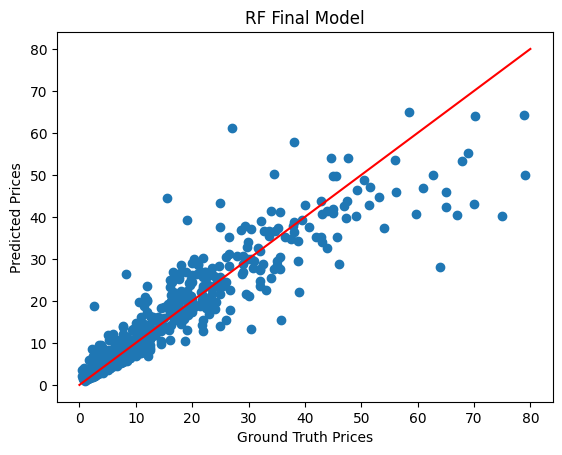

In [85]:
x_temp = [0, 80]; y_temp = [0,80]

plt.scatter(y_test, y_pred)
plt.plot(x_temp, y_temp, 'r-')

plt.xlabel("Ground Truth Prices")
plt.ylabel("Predicted Prices")

plt.title("RF Final Model")

plt.show()

#SVR

##K-Fold Cross Validation


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import KFold
"""
# estimator
svr_regressor = SVR()

# parameter distributions of the estimator
grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 5, 10],
    'gamma': [0.1, 0.35, 0.5, 1]
}

# kfold random cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search_svr = GridSearchCV(estimator=svr_regressor, param_grid=grid, cv=kf, scoring='r2', n_jobs=-1, verbose=2)

# fit the model to the data
grid_search_svr.fit(X_train, y_train)

print("Best Parameters: ", grid_search_svr.best_params_)
print("Best Score: ", grid_search_svr.best_score_)"""

'\n# estimator\nsvr_regressor = SVR()\n\n# parameter distributions of the estimator\ngrid = {\n    \'kernel\': [\'linear\', \'rbf\', \'poly\'],\n    \'C\': [0.1, 1, 5, 10],\n    \'gamma\': [0.1, 0.35, 0.5, 1]\n}\n\n# kfold random cross-validation\nkf = KFold(n_splits=5, shuffle=True, random_state=1)\ngrid_search_svr = GridSearchCV(estimator=svr_regressor, param_grid=grid, cv=kf, scoring=\'r2\', n_jobs=-1, verbose=2)\n\n# fit the model to the data\ngrid_search_svr.fit(X_train, y_train)\n\nprint("Best Parameters: ", grid_search_svr.best_params_)\nprint("Best Score: ", grid_search_svr.best_score_)'

##Training

Get validation accuracy

In [87]:
from sklearn.svm import SVR

#bestsvr = SVR(**grid_search_svr.best_params_)
bestsvr = SVR(C=10, epsilon=0.1, gamma=0.35, kernel='poly')
kf = KFold(n_splits=5, shuffle=True, random_state=1)
r2 = cross_val_score(bestsvr, X_train, y_train, scoring='r2', cv=kf, n_jobs=-1)
mse = cross_val_score(bestsvr, X_train, y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
print('-'*50)
print(f'Mean Squared Error (MSE): {-mse.mean():.4f}')
print(f'R^2 Score: {r2.mean():.4f}')
print('-'*50)

--------------------------------------------------
Mean Squared Error (MSE): 18.5953
R^2 Score: 0.8485
--------------------------------------------------


In [88]:
x_temp = [0, 80]; y_temp = [0,80]
"""
plt.scatter(y_valid, y_predval)
plt.plot(x_temp, y_temp, 'r-')
plt.xlabel('Ground Truth Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR Validation')
plt.show()"""

"\nplt.scatter(y_valid, y_predval)\nplt.plot(x_temp, y_temp, 'r-')\nplt.xlabel('Ground Truth Prices')\nplt.ylabel('Predicted Prices')\nplt.title('SVR Validation')\nplt.show()"

##Final Score

Train the model on train + validation data to report the prediction performance on the test set

In [89]:
print('Final SVR Model')
print('-'*50)
bestsvr.fit(X_train, y_train)

y_pred = bestsvr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print('-'*50)

Final SVR Model
--------------------------------------------------
Mean Squared Error (MSE): 14.6681
R^2 Score: 0.8912
--------------------------------------------------


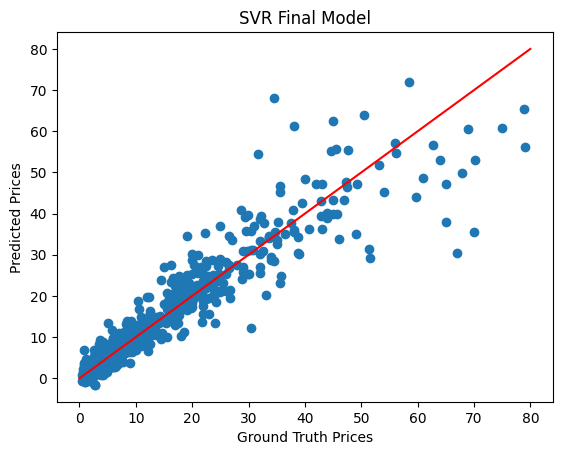

In [90]:
x_temp = [0, 80]; y_temp = [0,80]

plt.scatter(y_test, y_pred)
plt.plot(x_temp, y_temp, 'r-')

plt.xlabel("Ground Truth Prices")
plt.ylabel("Predicted Prices")

plt.title("SVR Final Model")

plt.show()

# Linear Regression

##K-fold Cross Validation

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
"""
# estimator
lr = SGDRegressor(random_state=1, penalty='l2', loss='squared_error')

# parameter distributions of the estimator
grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': [0.0001, 0.001, 0.01, 0.1]
}

# kfold random cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search_lr = GridSearchCV(estimator=lr, param_grid=grid, cv=kf, scoring='r2', n_jobs=-1, verbose=2)

# fit the model to the data
grid_search_lr.fit(X_train, y_train)

print("Best Parameters: ", grid_search_lr.best_params_)
print("Best Score: ", grid_search_lr.best_score_)"""

'\n# estimator\nlr = SGDRegressor(random_state=1, penalty=\'l2\', loss=\'squared_error\')\n\n# parameter distributions of the estimator\ngrid = {\n    \'alpha\': [0.00001, 0.0001, 0.001, 0.01],\n    \'learning_rate\': [\'constant\', \'optimal\', \'invscaling\'],\n    \'eta0\': [0.0001, 0.001, 0.01, 0.1]\n}\n\n# kfold random cross-validation\nkf = KFold(n_splits=5, shuffle=True, random_state=1)\ngrid_search_lr = GridSearchCV(estimator=lr, param_grid=grid, cv=kf, scoring=\'r2\', n_jobs=-1, verbose=2)\n\n# fit the model to the data\ngrid_search_lr.fit(X_train, y_train)\n\nprint("Best Parameters: ", grid_search_lr.best_params_)\nprint("Best Score: ", grid_search_lr.best_score_)'

##Training

Get validation accuracy

In [92]:
#bestlr = SGDRegressor(random_state=1, penalty='l2', loss='squared_error', **grid_search_lr.best_params_)
bestlr = SGDRegressor(random_state=1, penalty='l2', loss='squared_error', alpha=0.001, eta0=0.1, learning_rate='invscaling')
kf = KFold(n_splits=5, shuffle=True, random_state=1)
r2 = cross_val_score(bestlr, X_train, y_train, scoring='r2', cv=kf, n_jobs=-1)
mse = cross_val_score(bestlr, X_train, y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
print('-'*50)
print(f'Mean Squared Error (MSE): {-mse.mean():.4f}')
print(f'R^2 Score: {r2.mean():.4f}')
print('-'*50)

--------------------------------------------------
Mean Squared Error (MSE): 34.4267
R^2 Score: 0.7201
--------------------------------------------------


In [93]:
x_temp = [0, 80]; y_temp = [0,80]
"""
plt.scatter(y_valid, y_predval)
plt.plot(x_temp, y_temp, 'r-')
plt.xlabel('Ground Truth Prices')
plt.ylabel('Predicted Prices')
plt.title('LR Validation')
plt.show()"""

"\nplt.scatter(y_valid, y_predval)\nplt.plot(x_temp, y_temp, 'r-')\nplt.xlabel('Ground Truth Prices')\nplt.ylabel('Predicted Prices')\nplt.title('LR Validation')\nplt.show()"

##Final Score

Train the model on train + validation data to report the prediction performance on the test set

In [94]:
print('Final Linear Regression Model')
print('-'*50)
bestlr.fit(X_train, y_train)

y_pred = bestlr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print('-'*50)

Final Linear Regression Model
--------------------------------------------------
Mean Squared Error (MSE): 26.9480
R^2 Score: 0.8002
--------------------------------------------------


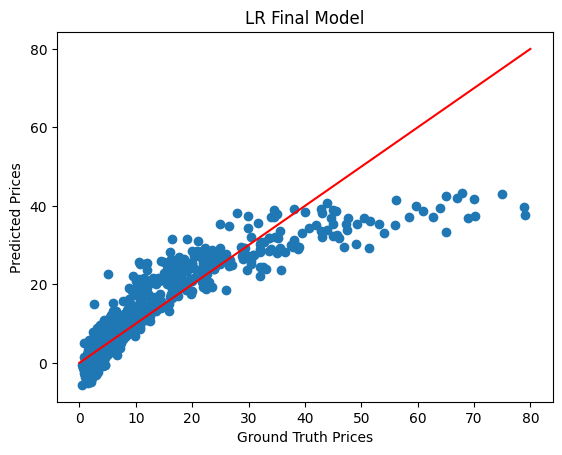

In [95]:
x_temp = [0, 80]; y_temp = [0,80]

plt.scatter(y_test, y_pred)
plt.plot(x_temp, y_temp, 'r-')

plt.xlabel("Ground Truth Prices")
plt.ylabel("Predicted Prices")
plt.title("LR Final Model")
plt.show()

#ANN

In [96]:
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=1)

In [97]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

class CarPricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(CarPricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

def train_model(model, criterion, optimizer, num_epochs, train_loader, val_loader, verbose=False):
    validation_loss = []
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()

        val_loss /= len(val_loader)
        if verbose:
          print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {val_loss:.4f}')
        validation_loss.append(val_loss)
    return validation_loss

def predict(model, test_loader):
    model.eval()
    predictions = []
    targets = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            targets.extend(labels.cpu().numpy())
    return np.array(predictions), np.array(targets)


In [98]:
y_train = y_train1.values
y_test = y_test.values
y_valid = y_valid.values
X_train = torch.tensor(X_train1, dtype=torch.float32)
y_train = torch.tensor(y_train1, dtype=torch.float32)

In [99]:
X_valid, y_valid = torch.tensor(X_valid, dtype=torch.float32), torch.tensor(y_valid, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

y_train = y_train.unsqueeze(1)
y_valid = y_valid.unsqueeze(1)

##Hyperparameter Tuning
The below hyperparameters were subject to accuracy testing to calculate optimum values. The default values of these hyperparameters are given below:


*   hidden_size = 10
*   hidden_size2 = 10
*   lr = 0.001



In [100]:
# Create DataLoader for training and validation sets
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=32,shuffle=False)
val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_valid, y_valid), batch_size=32, shuffle=False)

# Initialize the hyperparameters, models, loss function, and optimizer
hs1 = 10
hs2 = 20
hs3 = 30
hs4 = 40
hs5 = 50

lr1 = 0.001

val_loss1 = []
val_loss2 = []
val_loss3 = []
val_loss4 = []
val_loss5 = []

input_size = X_train.shape[1]
output_size = 1

model1 = CarPricePredictor(input_size, hs1, hs1)
model2 = CarPricePredictor(input_size, hs2, hs2)
model3 = CarPricePredictor(input_size, hs3, hs3)
model4 = CarPricePredictor(input_size, hs4, hs4)
model5 = CarPricePredictor(input_size, hs5, hs5)

optimizer1 = optim.Adam(model1.parameters(), lr=lr1)
optimizer2 = optim.Adam(model2.parameters(), lr=lr1)
optimizer3 = optim.Adam(model3.parameters(), lr=lr1)
optimizer4 = optim.Adam(model4.parameters(), lr=lr1)
optimizer5 = optim.Adam(model5.parameters(), lr=lr1)

criterion = nn.MSELoss()

# Train the models
num_epochs = 100
val_loss1 = train_model(model1, criterion, optimizer1, num_epochs, train_loader, val_loader)
val_loss2 = train_model(model2, criterion, optimizer2, num_epochs, train_loader, val_loader)
val_loss3 = train_model(model3, criterion, optimizer3, num_epochs, train_loader, val_loader)
val_loss4 = train_model(model4, criterion, optimizer4, num_epochs, train_loader, val_loader)
val_loss5 = train_model(model5, criterion, optimizer5, num_epochs, train_loader, val_loader)

predictions1, targets1 = predict(model1, val_loader)
predictions2, targets2 = predict(model2, val_loader)
predictions3, targets3 = predict(model3, val_loader)
predictions4, targets4 = predict(model4, val_loader)
predictions5, targets5 = predict(model5, val_loader)

# Calculate MSE and R^2 score
mse1 = mean_squared_error(targets1, predictions1)
mse2 = mean_squared_error(targets2, predictions2)
mse3 = mean_squared_error(targets3, predictions3)
mse4 = mean_squared_error(targets4, predictions4)
mse5 = mean_squared_error(targets5, predictions5)

r2_1 = r2_score(targets1, predictions1)
r2_2 = r2_score(targets2, predictions2)
r2_3 = r2_score(targets3, predictions3)
r2_4 = r2_score(targets4, predictions4)
r2_5 = r2_score(targets5, predictions5)

print('-'*50)
print(f'Mean Squared Error for Model 1 with hidden size {hs1}: {mse1:.4f}')
print(f'R^2 Score for Model 1 with hidden size {hs1}: {r2_1:.4f}')
print(f'Mean Squared Error for Model 2 with hidden size {hs2}: {mse2:.4f}')
print(f'R^2 Score for Model 2 with hidden size {hs2}: {r2_2:.4f}')
print(f'Mean Squared Error for Model 3 with hidden size {hs3}: {mse3:.4f}')
print(f'R^2 Score for Model 3 with hidden size {hs3}: {r2_3:.4f}')
print(f'Mean Squared Error for Model 4 with hidden size {hs4}: {mse4:.4f}')
print(f'R^2 Score for Model 4 with hidden size {hs4}: {r2_4:.4f}')
print(f'Mean Squared Error for Model 5 with hidden size {hs5}: {mse5:.4f}')
print(f'R^2 Score for Model 5 with hidden size {hs5}: {r2_5:.4f}')

--------------------------------------------------
Mean Squared Error for Model 1 with hidden size 10: 19.1289
R^2 Score for Model 1 with hidden size 10: 0.8528
Mean Squared Error for Model 2 with hidden size 20: 18.0763
R^2 Score for Model 2 with hidden size 20: 0.8609
Mean Squared Error for Model 3 with hidden size 30: 16.4968
R^2 Score for Model 3 with hidden size 30: 0.8730
Mean Squared Error for Model 4 with hidden size 40: 16.5625
R^2 Score for Model 4 with hidden size 40: 0.8725
Mean Squared Error for Model 5 with hidden size 50: 15.9812
R^2 Score for Model 5 with hidden size 50: 0.8770


In [101]:
hs6 = 60
hs7 = 70
hs8 = 80
hs9 = 90
hs10 = 100

model6 = CarPricePredictor(input_size, hs6, hs6)
model7 = CarPricePredictor(input_size, hs7, hs7)
model8 = CarPricePredictor(input_size, hs8, hs8)
model9 = CarPricePredictor(input_size, hs9, hs9)
model10 = CarPricePredictor(input_size, hs10, hs10)

optimizer6 = optim.Adam(model6.parameters(), lr=lr1)
optimizer7 = optim.Adam(model7.parameters(), lr=lr1)
optimizer8 = optim.Adam(model8.parameters(), lr=lr1)
optimizer9 = optim.Adam(model9.parameters(), lr=lr1)
optimizer10 = optim.Adam(model10.parameters(), lr=lr1)

val_loss6 = train_model(model6, criterion, optimizer6, num_epochs, train_loader, val_loader)
val_loss7 = train_model(model7, criterion, optimizer7, num_epochs, train_loader, val_loader)
val_loss8 = train_model(model8, criterion, optimizer8, num_epochs, train_loader, val_loader)
val_loss9 = train_model(model9, criterion, optimizer9, num_epochs, train_loader, val_loader)
val_loss10 = train_model(model10, criterion, optimizer10, num_epochs, train_loader, val_loader)

predictions6, targets6 = predict(model6, val_loader)
predictions7, targets7 = predict(model7, val_loader)
predictions8, targets8 = predict(model8, val_loader)
predictions9, targets9 = predict(model9, val_loader)
predictions10, targets10 = predict(model10, val_loader)

mse6 = mean_squared_error(targets6, predictions6)
mse7 = mean_squared_error(targets7, predictions7)
mse8 = mean_squared_error(targets8, predictions8)
mse9 = mean_squared_error(targets9, predictions9)
mse10 = mean_squared_error(targets10, predictions10)

r2_6 = r2_score(targets6, predictions6)
r2_7 = r2_score(targets7, predictions7)
r2_8 = r2_score(targets8, predictions8)
r2_9 = r2_score(targets9, predictions9)
r2_10 = r2_score(targets10, predictions10)

print('-'*50)
print(f'Mean Squared Error for Model 6 with hidden size {hs6}: {mse6:.4f}')
print(f'R^2 Score for Model 6 with hidden size {hs6}: {r2_6:.4f}')
print(f'Mean Squared Error for Model 7 with hidden size {hs7}: {mse7:.4f}')
print(f'R^2 Score for Model 7 with hidden size {hs7}: {r2_7:.4f}')
print(f'Mean Squared Error for Model 8 with hidden size {hs8}: {mse8:.4f}')
print(f'R^2 Score for Model 8 with hidden size {hs8}: {r2_8:.4f}')
print(f'Mean Squared Error for Model 9 with hidden size {hs9}: {mse9:.4f}')
print(f'R^2 Score for Model 9 with hidden size {hs9}: {r2_9:.4f}')
print(f'Mean Squared Error for Model 10 with hidden size {hs10}: {mse10:.4f}')
print(f'R^2 Score for Model 10 with hidden size {hs10}: {r2_10:.4f}')


--------------------------------------------------
Mean Squared Error for Model 6 with hidden size 60: 16.5998
R^2 Score for Model 6 with hidden size 60: 0.8723
Mean Squared Error for Model 7 with hidden size 70: 16.9199
R^2 Score for Model 7 with hidden size 70: 0.8698
Mean Squared Error for Model 8 with hidden size 80: 17.4636
R^2 Score for Model 8 with hidden size 80: 0.8656
Mean Squared Error for Model 9 with hidden size 90: 16.4660
R^2 Score for Model 9 with hidden size 90: 0.8733
Mean Squared Error for Model 10 with hidden size 100: 17.7693
R^2 Score for Model 10 with hidden size 100: 0.8633


In [102]:
lr1 = 0.001
lr2 = 0.002
lr3 = 0.005
lr4 = 0.01
lr5 = 0.05

optimal_model = CarPricePredictor(input_size, hs5, hs5)

optimizer_lr1 = optim.Adam(optimal_model.parameters(), lr=lr1)
optimizer_lr2 = optim.Adam(optimal_model.parameters(), lr=lr2)
optimizer_lr3 = optim.Adam(optimal_model.parameters(), lr=lr3)
optimizer_lr4 = optim.Adam(optimal_model.parameters(), lr=lr4)
optimizer_lr5 = optim.Adam(optimal_model.parameters(), lr=lr5)

val_loss_lr1 = train_model(optimal_model, criterion, optimizer_lr1, num_epochs, train_loader, val_loader)
predictions_lr1, targets_lr1 = predict(optimal_model, val_loader)
mse_lr1 = mean_squared_error(targets_lr1, predictions_lr1)
r2_lr1 = r2_score(targets_lr1, predictions_lr1)
print(f'Mean Squared Error for Optimal Model with learning rate {lr1}: {mse_lr1:.4f}')
print(f'R^2 Score for Optimal Model with learning rate {lr1}: {r2_lr1:.4f}')

val_loss_lr2 = train_model(optimal_model, criterion, optimizer_lr2, num_epochs, train_loader, val_loader)
predictions_lr2, targets_lr2 = predict(optimal_model, val_loader)
mse_lr2 = mean_squared_error(targets_lr2, predictions_lr2)
r2_lr2 = r2_score(targets_lr2, predictions_lr2)
print(f'Mean Squared Error for Optimal Model with learning rate {lr2}: {mse_lr2:.4f}')
print(f'R^2 Score for Optimal Model with learning rate {lr2}: {r2_lr2:.4f}')

val_loss_lr3 = train_model(optimal_model, criterion, optimizer_lr3, num_epochs, train_loader, val_loader)
predictions_lr3, targets_lr3 = predict(optimal_model, val_loader)
mse_lr3 = mean_squared_error(targets_lr3, predictions_lr3)
r2_lr3 = r2_score(targets_lr3, predictions_lr3)
print(f'Mean Squared Error for Optimal Model with learning rate {lr3}: {mse_lr3:.4f}')
print(f'R^2 Score for Optimal Model with learning rate {lr3}: {r2_lr3:.4f}')

val_loss_lr4 = train_model(optimal_model, criterion, optimizer_lr4, num_epochs, train_loader, val_loader)
predictions_lr4, targets_lr4 = predict(optimal_model, val_loader)
mse_lr4 = mean_squared_error(targets_lr4, predictions_lr4)
r2_lr4 = r2_score(targets_lr4, predictions_lr4)
print(f'Mean Squared Error for Optimal Model with learning rate {lr4}: {mse_lr4:.4f}')
print(f'R^2 Score for Optimal Model with learning rate {lr4}: {r2_lr4:.4f}')

val_loss_lr5 = train_model(optimal_model, criterion, optimizer_lr5, num_epochs, train_loader, val_loader)
predictions_lr5, targets_lr5 = predict(optimal_model, val_loader)
mse_lr5 = mean_squared_error(targets_lr5, predictions_lr5)
r2_lr5 = r2_score(targets_lr5, predictions_lr5)
print(f'Mean Squared Error for Optimal Model with learning rate {lr5}: {mse_lr5:.4f}')
print(f'R^2 Score for Optimal Model with learning rate {lr5}: {r2_lr5:.4f}')



Mean Squared Error for Optimal Model with learning rate 0.001: 17.3918
R^2 Score for Optimal Model with learning rate 0.001: 0.8662
Mean Squared Error for Optimal Model with learning rate 0.002: 17.9392
R^2 Score for Optimal Model with learning rate 0.002: 0.8619
Mean Squared Error for Optimal Model with learning rate 0.005: 17.8662
R^2 Score for Optimal Model with learning rate 0.005: 0.8625
Mean Squared Error for Optimal Model with learning rate 0.01: 17.2458
R^2 Score for Optimal Model with learning rate 0.01: 0.8673
Mean Squared Error for Optimal Model with learning rate 0.05: 17.3052
R^2 Score for Optimal Model with learning rate 0.05: 0.8668


##Compute Test Accuracy for the Optimal Model
Optimal model was found to have the following hyperparameters:

*   hidden_size1 = 50
*   hidden_size2 = 50
*   lr = 0.001




In [103]:
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_test, y_test), batch_size=32, shuffle=False)
predictions_test, targets_test = predict(optimal_model, test_loader)
mse_test = mean_squared_error(targets_test, predictions_test)
r2_test = r2_score(targets_test, predictions_test)
print(f'Mean Squared Error for Test Model: {mse_test:.4f}')
print(f'R^2 Score for Test Model: {r2_test:.4f}')

Mean Squared Error for Test Model: 16.9761
R^2 Score for Test Model: 0.8741


## Plotting loss for optimal model

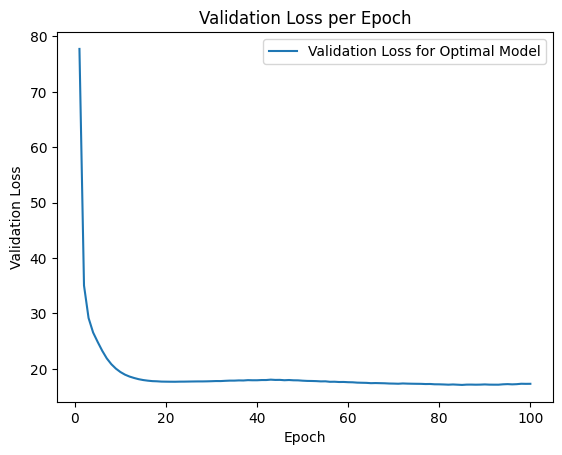

In [104]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 101))

# Plotting
plt.plot(epochs, val_loss_lr1, label='Validation Loss for Optimal Model')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

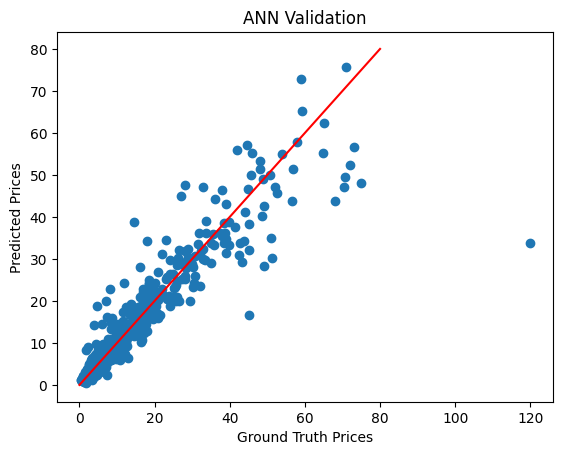

In [105]:
x_temp = [0, 80]; y_temp = [0,80]

plt.scatter(targets_lr1, predictions_lr1)
plt.plot(x_temp, y_temp, 'r-')
plt.xlabel('Ground Truth Prices')
plt.ylabel('Predicted Prices')
plt.title('ANN Validation')
plt.show()